In [1]:
#Import statements

#Standard Impors
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns

#Importing cleaned data
from ipynb.fs.full.ncaabwinsmodel import allgames_df2

#Model Prep
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Model Types
from sklearn.ensemble import RandomForestClassifier

#Model Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve

#For Principal Componenet Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Cross Validating the model
from sklearn.model_selection import cross_val_score, StratifiedKFold

C:\Users\txcwa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 0.7117911710989354
Cross-validation accuracies for each fold:  [0.7120139  0.70092209 0.70934117 0.706299   0.71543122]
Mean cross-validation accuracy:  0.7088014765042626


<Figure size 1000x600 with 1 Axes>

<Figure size 640x480 with 2 Axes>

Log Loss: 0.5820
Accuracy: 0.7118
Precision: 0.7097
Recall: 0.7139
F1 Score: 0.7118
ROC-AUC Score: 0.7786
Best Threshold by Youdenâ€™s J statistic: 0.4867


<Figure size 800x600 with 1 Axes>

<Figure size 800x600 with 1 Axes>

Expected Calibration Error (ECE): 0.0556
Explained Variance by Principal Component: [3.32216869e-01 8.11902956e-02 7.13171193e-02 6.64539083e-02
 4.96227248e-02 4.75975048e-02 4.69198574e-02 3.84645610e-02
 3.81854975e-02 3.67091694e-02 3.61579439e-02 3.30657712e-02
 2.52515511e-02 1.89762168e-02 1.75978011e-02 1.50258502e-02
 1.33594422e-02 1.28323886e-02 1.16280037e-02 4.65270791e-03
 2.77237035e-03 1.23088979e-06 1.21450807e-06]


<Figure size 800x600 with 2 Axes>

In [2]:
# Model

# Creating the Random Forest Model to be used in the Sims
# Defining features and target
X = allgames_df2.drop(['Winner'], axis=1)
y = allgames_df2['Winner']

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
ncaabwins = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
ncaabwins.fit(X_train, y_train)

# Predict on the test set
y_pred = ncaabwins.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7117911710989354


In [3]:
#Cross Validation

# Define the number of folds for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy for each fold
cv_scores = cross_val_score(ncaabwins, X, y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Cross-validation accuracies for each fold: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Cross-validation accuracies for each fold:  [0.7120139  0.70092209 0.70934117 0.706299   0.71543122]
Mean cross-validation accuracy:  0.7088014765042626


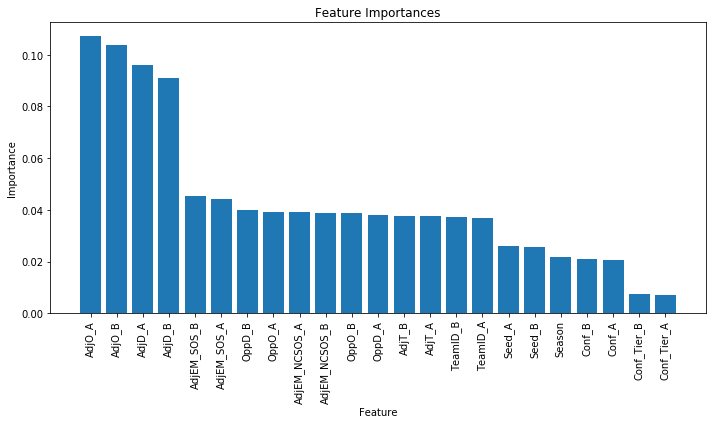

In [4]:
# Feature Importance

# Get feature importances
importance = ncaabwins.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importance
sorted_feature_names = [X.columns[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
#plt.show()

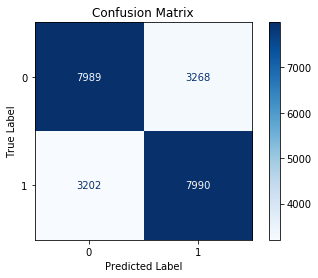

In [5]:
# Confusion Matrix

# Making predictions on the test data
predictions = ncaabwins.predict(X_test)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Log Loss: 0.5820
Accuracy: 0.7118
Precision: 0.7097
Recall: 0.7139
F1 Score: 0.7118
ROC-AUC Score: 0.7786
Best Threshold by Youden’s J statistic: 0.4867


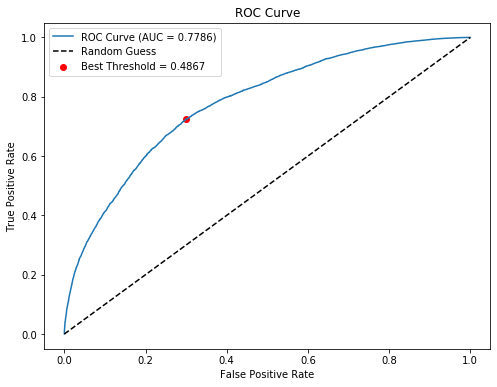

In [6]:
# Log Loss and friends
y_prob = ncaabwins.predict_proba(X_test)[:,1]
loss = log_loss(y_test, y_prob)
loss

# Calculate classification-specific metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Log Loss: {loss:.4f}') # Log Loss
print(f'Accuracy: {accuracy:.4f}') # Correct predictions/Total Predictions
print(f'Precision: {precision:.4f}') # True positives/Total Oberservations
print(f'Recall: {recall:.4f}') # True positives/ Predicted Positives
print(f'F1 Score: {f1:.4f}') # Harmonic Mean of Precision and Recall

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Youden's J statistic for each threshold, In this case looking for max of 
# True postive rate compared to False postiive rate (TPR - FPR)
j_scores = tpr - fpr
best_threshold_index = j_scores.argmax()
best_threshold = thresholds[best_threshold_index]
print(f'Best Threshold by Youden’s J statistic: {best_threshold:.4f}')

# Plot ROC Curve with the best threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', marker='o', label=f'Best Threshold = {best_threshold:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

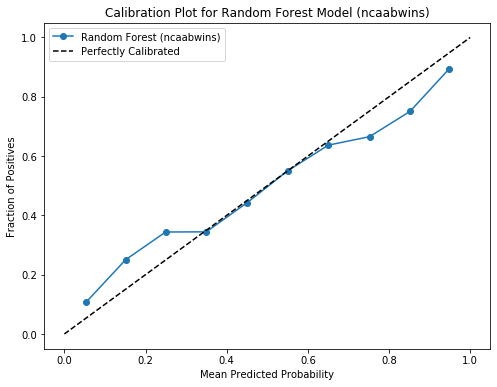

Expected Calibration Error (ECE): 0.0556


In [7]:
# Calibration Plot

# Predict probabilities for the positive class
y_prob = ncaabwins.predict_proba(X_test)[:, 1]

# Compute calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker="o", label="Random Forest (ncaabwins)")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plot for Random Forest Model (ncaabwins)")
plt.legend()
plt.show()

# Points over y = x indicates the model is underconfident in these scenarios and under the line indicates the model is 
# overconfident

def expected_calibration_error(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    ece = 0.0
    for i in range(n_bins):
        bin_mask = (y_prob > bin_boundaries[i]) & (y_prob <= bin_boundaries[i + 1])
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask])
            bin_confidence = np.mean(y_prob[bin_mask])
            ece += (bin_size / len(y_prob)) * abs(bin_confidence - bin_accuracy)
    return ece

ece = expected_calibration_error(y_test, y_prob)
print(f"Expected Calibration Error (ECE): {ece:.4f}")

Explained Variance by Principal Component: [3.32216869e-01 8.11902956e-02 7.13171193e-02 6.64539083e-02
 4.96227248e-02 4.75975048e-02 4.69198574e-02 3.84645610e-02
 3.81854975e-02 3.67091694e-02 3.61579439e-02 3.30657712e-02
 2.52515511e-02 1.89762168e-02 1.75978011e-02 1.50258502e-02
 1.33594422e-02 1.28323886e-02 1.16280037e-02 4.65270791e-03
 2.77237035e-03 1.23088979e-06 1.21450807e-06]


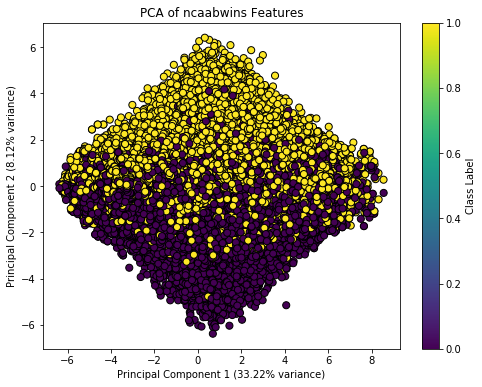

In [8]:
# PCA Analysis

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want (e.g., 2 for 2D visualization)
pca = PCA(n_components=23)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Component:", explained_variance)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)  # Color by class if available
plt.xlabel(f"Principal Component 1 ({explained_variance[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]:.2%} variance)")
plt.title("PCA of ncaabwins Features")
plt.colorbar(label="Class Label")
plt.show()